In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

### Loading our CTR data for A/B Test

In [2]:
df_ab_test = pd.read_csv('ad_click_dataset.csv')

### EDA

In [5]:
df_ab_test

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


In [10]:
df_ab_test.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [11]:
df_ab_test.describe()

,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [12]:
df_ab_test.groupby("time_of_day").sum("click")

,id,age,click
time_of_day,,,
Afternoon,10523567,42071.0,1382
Evening,9555097,40097.0,1233
Morning,10903539,45162.0,1414
Night,9657668,41425.0,1187


In [13]:
df_ab_test.groupby("ad_position").sum("click")

,id,age,click
ad_position,,,
Bottom,13658598,57794.0,1936
Side,13665886,56515.0,1633
Top,13199343,53966.0,1649


In [ ]:
'''
To look at
- How many observations per each ad_position
- How many observations per each time_of_day
- Need to clean the dataset first
'''

A simple bar chart showing the total clicks versus no-clicks in each group (ad_click_position) can provide a clear visual comparison of user engagement

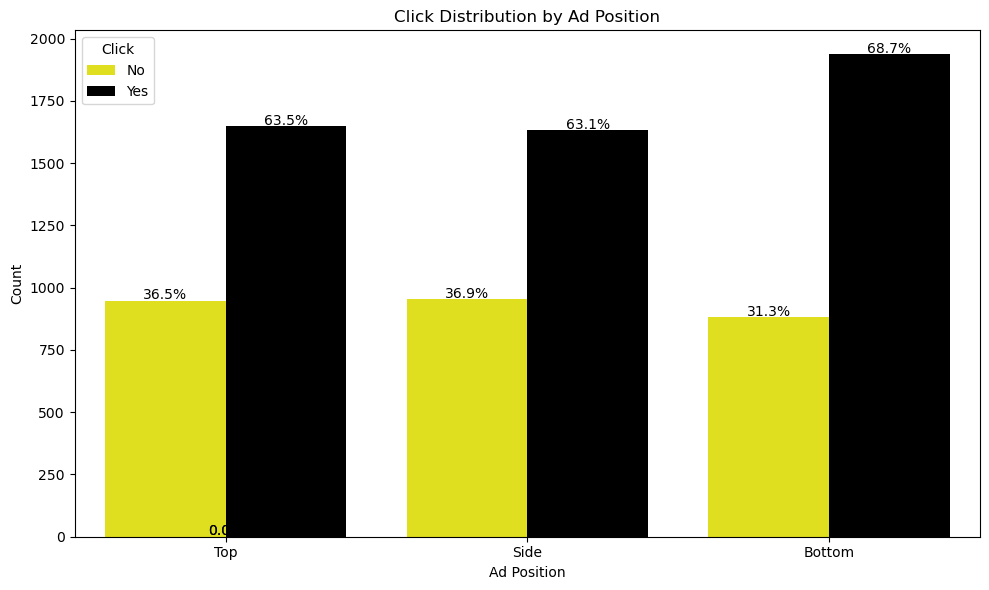

In [18]:
# Custom palette for no-click and click
palette = {0: 'yellow', 1: 'black'}

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ad_position', hue='click', data=df_ab_test, palette=palette)
plt.title('Click Distribution by Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Count')
plt.legend(title='Click', labels=['No', 'Yes'])

# Calculate totals
group_counts = df_ab_test.groupby(['ad_position']).size()

# Get tick positions and labels
xticks = ax.get_xticks()
xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]

for p in ax.patches:
    height = p.get_height()
    bar_x = p.get_x() + p.get_width() / 2

    # Find the closest tick to the bar_x
    distances = [abs(bar_x - tick) for tick in xticks]
    closest_index = np.argmin(distances)
    ad_position = xticklabels[closest_index]

    total = group_counts.loc[ad_position]
    percentage = 100 * height / total

    ax.text(
        bar_x,
        height + 5,
        f'{percentage:.1f}%',
        ha='center',
        color='black',
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [20]:
# Checking if any columns in the dataset have nulls

df_ab_test.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64